# Run Time Result

### 01/01/18

- start

In [1]:
%pylab inline 
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
radius = [800, 900, 1000, 1100, 1200, 1300, 1800]
data = [4753, 6098, 7677, 9433, 11368, 13571, 28347]
Edge_time = [ 2071, 3016, 5222, 7143, 10497, 15984, 68892]
Set_constraint = [ 280, 399, 697, 982, 1367, 2096, 7249 ]
Total_size = [108208288, 115985472, 126334704, 133865680, 142018512, 150927232 ,230933216]
Initial_house_time = [79, 124, 190, 312, 404, 561, 2127]
highest_memory_used = [ 300, 400, 500, 700, 900, 1160]

Time for 300000 houses:  91.1613762145 days
Time for 300000 houses:  7.1966727135 days
Time for 300000 houses:  2.28691455124 days


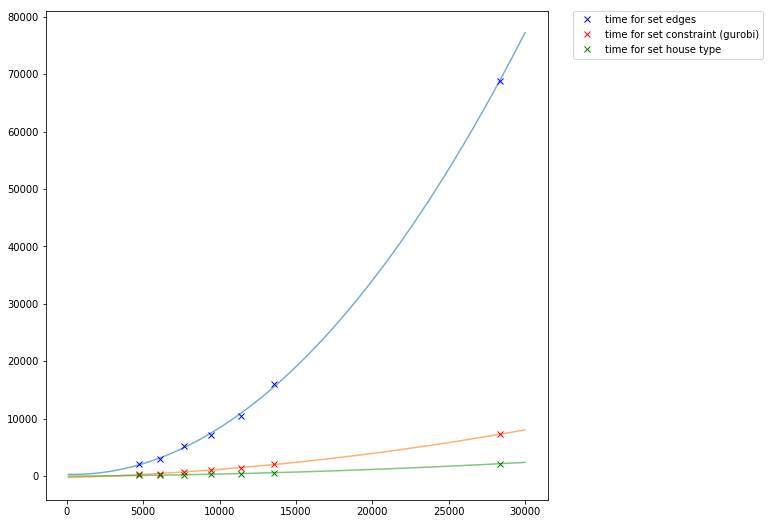

In [3]:
figure(figsize=(9,9)); 

for item in [Edge_time, Set_constraint, Initial_house_time]:
    
    X = np.array([data,]).T
    X = np.insert(X, 0, 1, axis = 1)
    X = np.append(X, (np.array([data,])*np.array([data,])).T, axis = 1)
    y = np.array(item)
    
    W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
    W_Hat
    print "Time for 300000 houses: ", W_Hat.dot([1, 300000, 300000**2])/3600/24, "days"
    orderx = np.array([np.arange(100,30000,10),]).T#.reshape((2499,1))
    square = orderx*orderx
    X_test = np.insert(orderx, 0, 1, axis = 1)
    X_test = np.append(X_test, square , axis = 1)
    plot(orderx, W_Hat.dot(X_test.T)   , '-', alpha = 0.6 ) ;

plot(data,Edge_time, 'bx', label = "time for set edges") ;
plot(data,Set_constraint, 'rx', label = "time for set constraint (gurobi)")
plot(data,Initial_house_time, 'gx', label = "time for set house type");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Total Size for 300000 houses:  2.91162038404 Gigabytes


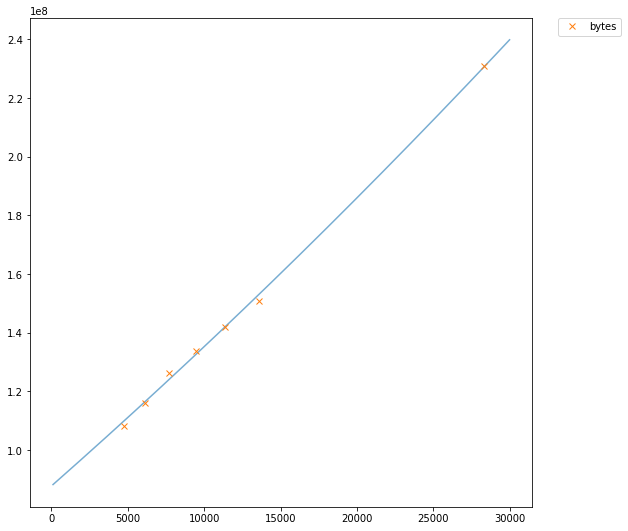

In [4]:
figure(figsize=(9,9))

X = np.array([data,]).T
X = np.insert(X, 0, 1, axis = 1)
X = np.append(X, (np.array([data,])*np.array([data,])).T, axis = 1)
y = np.array(Total_size)

W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
W_Hat
print "Total Size for 300000 houses: ", W_Hat.dot([1, 300000, 300000**2])/1e+9, "Gigabytes"
orderx = np.array([np.arange(100,30000,10),]).T#.reshape((2499,1))
square = orderx*orderx
X_test = np.insert(orderx, 0, 1, axis = 1)
X_test = np.append(X_test, square , axis = 1)
plot(orderx, W_Hat.dot(X_test.T)   , '-', alpha = 0.6 ) ;
plot(data,Total_size, 'x',label = "bytes");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Total Memory for 300000 houses:  0.000336380327334 MiBs


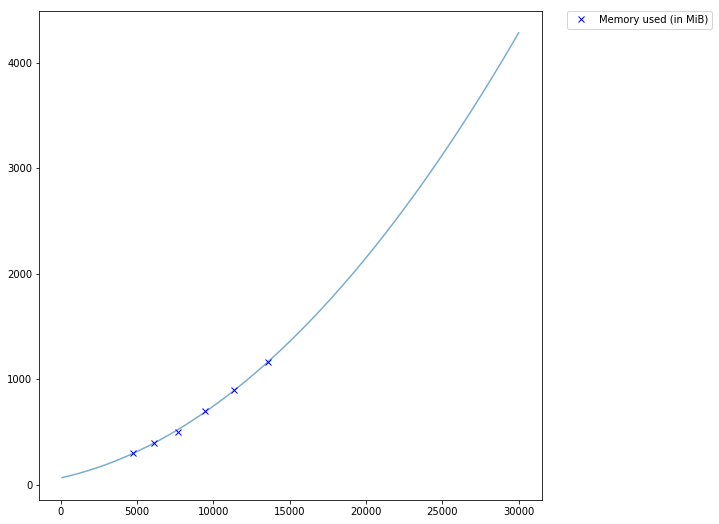

In [5]:
data = data[:-1]
figure(figsize=(9,9))

X = np.array([data,]).T
X = np.insert(X, 0, 1, axis = 1)
X = np.append(X, (np.array([data,])*np.array([data,])).T, axis = 1)
y = np.array(highest_memory_used)

W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
W_Hat
print "Total Memory for 300000 houses: ", W_Hat.dot([1, 300000, 300000**2])/1e+9, "MiBs"
orderx = np.array([np.arange(100,30000,10),]).T#.reshape((2499,1))
square = orderx*orderx
X_test = np.insert(orderx, 0, 1, axis = 1)
X_test = np.append(X_test, square , axis = 1)
plot(orderx, W_Hat.dot(X_test.T)   , '-', alpha = 0.6 ) ;

plot(data,highest_memory_used, 'bx', label = "Memory used (in MiB)") ;
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);